In [1]:
import numpy as np
import pandas as pd

In [87]:
df = pd.DataFrame(tweets)

In [88]:
pd.set_option('max_colwidth',800)
df

,Tweet,User,Location,Timestamp
0,RT @Strandjunker: Allow me to address the elephant in the Coumo shitstorm: Trump loving Congressman Lee Zeldin is running for Governor of N…,vic_volare,,2021-04-08 14:11:33
1,RT @Strandjunker: Allow me to address the elephant in the Coumo shitstorm: Trump loving Congressman Lee Zeldin is running for Governor of N…,illjord,"Raleigh, NC",2021-04-08 14:11:32
2,RT @Strandjunker: Allow me to address the elephant in the Coumo shitstorm: Trump loving Congressman Lee Zeldin is running for Governor of N…,sandyrazo1964,"Fairbury, IL",2021-04-08 14:11:31
3,RT @TeaPainUSA: Partial list of leaders that attacked America.\n\nKing George\nRobert E. Lee\nEmperor Hirohito\nAdolf Hitler\nOsama Bin Laden\nDon…,Aleksan14370378,Northern California,2021-04-08 14:11:30
4,@USAmbUN @IsraelinUN Yet you’re giving $millions to the Palestinian Authority to literally murder Jews. Seems a tad… https://t.co/WH6iznqZHR,Tweetisrael,,2021-04-08 14:11:29


In [31]:
df['Cleaned Tweet'] = df['Tweet'].apply(clean_tweet)
df['Subject'] = keyword

# Sentiment Analysis

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
tweets_df = pd.read_csv('tweets_election.csv')
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)

In [4]:
tweets_df

,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
...,...,...,...,...,...,...
5548,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",Joe Biden,Oregon
5549,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",Joe Biden,Nevada
5550,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",Joe Biden,Texas
5551,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",Joe Biden,Delaware


In [5]:
import re
import spacy
nlp = spacy.load('en_core_web_lg')

In [6]:
def clean_tweet(tweet):
    tweet = re.sub('RT @[\w]*:','',tweet)
    tweet = re.sub('@[\w]*','',tweet)
    tweet = re.sub("https?://[A-Za-z0-9./]*","",tweet)
    tweet = re.sub("\n","",tweet)
    tweet = str(tweet).lower()
    
    
    tweet = " ".join(str(token) for token in nlp(tweet) if str(token) not in nlp.Defaults.stop_words)
    tweet = " ".join(str(token.lemma_) for token in nlp(tweet) if not token.is_punct)
    return tweet

In [7]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [8]:
tweets_df.head()

,geo,text,user,location,Subject,state,cleaned_text
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,confrontation cost walter wallace jr life s...
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid-19 rage trump lie
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr talk death oh oh number gott
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let forget create problem tell donald trump sc...
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,great supporter donald trump world mark zuc...


In [9]:
clean_tweet("After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting")

'confrontation cost walter wallace jr life set protest devolve rioting loot'

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
def tweet_polarity(tweet):
    return sid.polarity_scores(tweet)

In [12]:
#tweets_df['Polarity'] = tweets_df['Cleaned Tweet'].apply(tweet_polarity)
tweets_df['Polarity'] = tweets_df['cleaned_text'].apply(tweet_polarity)

In [13]:
#tweets_df.drop('Tweet', axis=1, inplace=True)

def sentimentVerdict(polarity):
    #print(polarity['compound'])
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [14]:
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentimentVerdict)

In [15]:
tweets_df

,geo,text,user,location,Subject,state,cleaned_text,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,confrontation cost walter wallace jr life s...,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid-19 rage trump lie,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr talk death oh oh number gott,"{'neg': 0.32, 'neu': 0.574, 'pos': 0.107, 'com...",Negative
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let forget create problem tell donald trump sc...,"{'neg': 0.356, 'neu': 0.366, 'pos': 0.277, 'co...",Negative
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,great supporter donald trump world mark zuc...,"{'neg': 0.153, 'neu': 0.417, 'pos': 0.431, 'co...",Positive
...,...,...,...,...,...,...,...,...,...
5548,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",Joe Biden,Oregon,donald trump big covid19 super spreader nat...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",Positive
5549,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",Joe Biden,Nevada,obama black vote reign 8 yrs sid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5550,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",Joe Biden,Texas,tony bobulinski communicate message joe biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5551,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",Joe Biden,Delaware,campaign 2016 lift forget man president trump ...,"{'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'comp...",Negative


In [16]:
#a = tweets_df.groupby(['Subject', 'Sentiment']).count()

In [17]:
myindex = ['Donald Trump', 'Joe Biden']

In [18]:
mycolumns = ['Positive', 'Neutral', 'Negative']

In [19]:
sentimet_df = pd.DataFrame(index=myindex, columns=mycolumns)

In [20]:
positive_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Positive')].count()['user']
neutral_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Neutral')].count()['user']
negative_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Negative')].count()['user']

positive_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Positive')].count()['user']
neutral_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Neutral')].count()['user']
negative_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Negative')].count()['user']

In [21]:
sentimet_df.at['Donald Trump', 'Positive'] = positive_trump
sentimet_df.at['Donald Trump', 'Neutral'] = neutral_trump
sentimet_df.at['Donald Trump', 'Negative'] = negative_trump

sentimet_df.at['Joe Biden', 'Positive'] = positive_biden
sentimet_df.at['Joe Biden', 'Neutral'] = neutral_biden
sentimet_df.at['Joe Biden', 'Negative'] = negative_biden

sentimet_df

,Positive,Neutral,Negative
Donald Trump,900,805,1223
Joe Biden,916,692,1017


A formula developed by using the approach suggested by Wicaksono et al. According to
Wicaksono et al, a positive tweet about a candidate indicates the intention to vote for that
candidate, and a negative tweet indicates the intention to vote for an opposition candidate. Using this
approach, as the third alternative method, vote share prediction is formulated as follow:
(𝑣𝑜𝑡𝑒 𝑠ℎ𝑎𝑟𝑒 𝑜𝑓 𝑝𝑎𝑟𝑡𝑦 (𝐴))% =
[𝑝𝑜𝑠(𝐴) + 𝑛𝑒𝑔(𝐵)] /
[𝑇(𝐴) + 𝑇(𝐵)]


In [22]:
len(tweets_df)

5553

# Text classification

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = tweets_df['cleaned_text']
y = tweets_df['Sentiment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Decision Trees
text_clf_trees = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier()),
])

# Naive Bayes

In [27]:
text_clf_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
predictions = text_clf_nb.predict(X_test)

In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89       692
     Neutral       0.88      0.77      0.82       449
    Positive       0.82      0.90      0.86       525

    accuracy                           0.86      1666
   macro avg       0.86      0.85      0.86      1666
weighted avg       0.86      0.86      0.86      1666



In [30]:
print(metrics.accuracy_score(y_test, predictions))

0.8613445378151261


In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [32]:
confusion_matrix

array([[615,  28,  49],
       [ 45, 346,  58],
       [ 31,  20, 474]], dtype=int64)

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

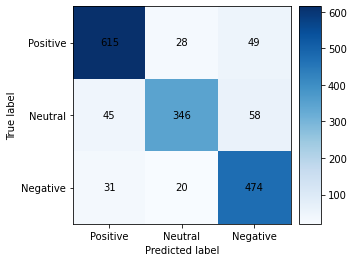

In [34]:
sent_list = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots()
im = axes.imshow(confusion_matrix, cmap='Blues')
axes_divider = make_axes_locatable(axes)

# Add an axes to the right of the main axes.
cax = axes_divider.append_axes("right", size="10%", pad="4%")

# We want to show all ticks...
axes.set_xticks(np.arange(len(confusion_matrix)))
axes.set_yticks(np.arange(len(confusion_matrix)))
# ... and label them with the respective list entries
axes.set_xticklabels(sent_list)
axes.set_yticklabels(sent_list)

# Set x,y label names
axes.set_xlabel('Predicted label')
axes.set_ylabel('True label')

# Loop over data dimensions and create text annotations.
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix)):
        axes.text(j, i, confusion_matrix[i,j], ha='center', va='center', color='black')

cb = fig.colorbar(im, cax=cax)

In [35]:
fig.savefig('naive-bayes.png')

In [36]:
len(confusion_matrix)

3

# Linear SCV

In [37]:
text_clf_lsvc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [38]:
predictions = text_clf_lsvc.predict(X_test)

In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92       692
     Neutral       0.89      0.87      0.88       449
    Positive       0.89      0.92      0.90       525

    accuracy                           0.91      1666
   macro avg       0.90      0.90      0.90      1666
weighted avg       0.91      0.91      0.91      1666



In [40]:
print(metrics.accuracy_score(y_test, predictions))

0.9063625450180072


In [41]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [42]:
confusion_matrix

array([[637,  26,  29],
       [ 28, 389,  32],
       [ 21,  20, 484]], dtype=int64)

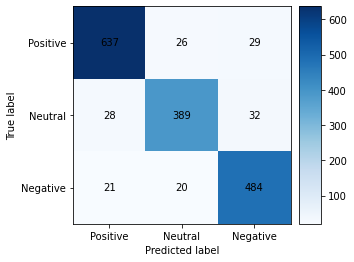

In [43]:
sent_list = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots()
im = axes.imshow(confusion_matrix, cmap='Blues')
axes_divider = make_axes_locatable(axes)

# Add an axes to the right of the main axes.
cax = axes_divider.append_axes("right", size="10%", pad="4%")

# We want to show all ticks...
axes.set_xticks(np.arange(len(confusion_matrix)))
axes.set_yticks(np.arange(len(confusion_matrix)))
# ... and label them with the respective list entries
axes.set_xticklabels(sent_list)
axes.set_yticklabels(sent_list)

# Set x,y label names
axes.set_xlabel('Predicted label')
axes.set_ylabel('True label')

# Loop over data dimensions and create text annotations.
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix)):
        axes.text(j, i, confusion_matrix[i,j], ha='center', va='center', color='black')

cb = fig.colorbar(im, cax=cax)

In [127]:
fig.savefig('svc.png')

In [42]:
import joblib

In [43]:
joblib.dump(text_clf_lsvc, 'sentiment_model.sav')

['sentiment_model.sav']

# LDA

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [46]:
dtm = cv.fit_transform(tweets_df['text'])

In [47]:
dtm

<5553x2737 sparse matrix of type '<class 'numpy.int64'>'
	with 54170 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)

In [50]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [51]:
len(cv.get_feature_names())

2737

In [52]:
for index,topic in enumerate(lda.components_):
    print(f"The top 15 words for topic #{index}")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic #0
['donald', 'trump', 'discovered', 'smears', 'bogus', 'named', 'martin', 'aspen', 'fake', 'exposed', 'hunter', 'man', 'nbc', 'joe', 'biden']


The top 15 words for topic #1
['successes', 'money', '11', 'term', 'greater', 'zuckerberg', 'elect', 'mark', 'supporter', 'fbi', 'biden', 'world', 'president', 'donald', 'trump']


The top 15 words for topic #2
['lift', 'campaigning', 'lost', 'completely', 'man', 'working', 'just', '2016', 'election', 'president', 'people', 'donald', 'joe', 'biden', 'trump']


The top 15 words for topic #3
['innocent', 'dear', 'followers', 'retweet', 'million', 'gym', 'couldn', 'high', 'school', 'polls', 'vote', 'joe', 'donald', 'trump', 'biden']


The top 15 words for topic #4
['gott', 'number', 'aren', 'talking', 've', 'hunter', 'son', 'day', 'deaths', 'jr', 'oh', 'joe', 'donald', 'trump', 'biden']




# Visualizations

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
tweets_df.head()

,geo,text,user,location,Subject,state,cleaned_text,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,confrontation cost walter wallace jr life s...,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid-19 rage trump lie,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr talk death oh oh number gott,"{'neg': 0.32, 'neu': 0.574, 'pos': 0.107, 'com...",Negative
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let forget create problem tell donald trump sc...,"{'neg': 0.356, 'neu': 0.366, 'pos': 0.277, 'co...",Negative
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,great supporter donald trump world mark zuc...,"{'neg': 0.153, 'neu': 0.417, 'pos': 0.431, 'co...",Positive


Text(0.5, 0.98, 'Sentiments for each candidate')

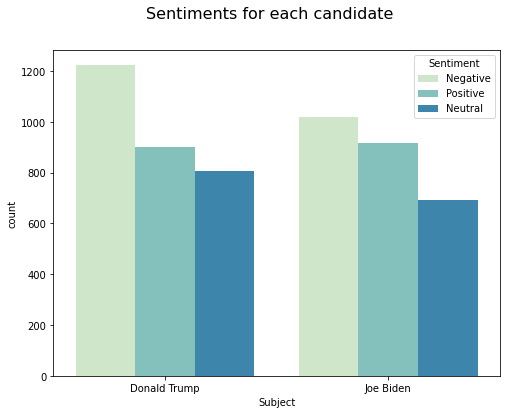

In [55]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Subject',hue='Sentiment', data=tweets_df, palette='GnBu')
fig.suptitle('Sentiments for each candidate', fontsize=16)

In [56]:
labels = list(sentimet_df.index)
labels.append('Others')
percentage_trump = round(((positive_trump + negative_biden)/len(tweets_df))*100, 2)
percentage_biden = round(((positive_biden + negative_trump)/len(tweets_df))*100, 2)
percentage_others = round(100 - percentage_biden - percentage_trump, 2)
data = [percentage_trump, percentage_biden, percentage_others]

In [57]:
labels

['Donald Trump', 'Joe Biden', 'Others']

Text(0.5, 0.98, 'Election estimations')

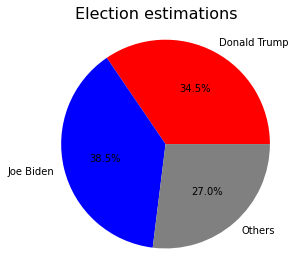

In [58]:
fig, axes = plt.subplots(figsize=(10,4))
axes.pie(data, labels=labels, autopct='%1.1f%%',radius=1.2,colors=['red','blue','gray'])
fig.suptitle("Election estimations",fontsize=16)

In [133]:
fig.savefig('estimations.png')